In [38]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **INFORME SITUACION INICIAL**

In [39]:
#Carga de datos
cliente = pd.read_csv('../Datasets/Clientes.csv', delimiter= ';', encoding= "utf-8", usecols=["ID","Provincia","Nombre_y_Apellido","Domicilio","Telefono","Edad","Localidad","X","Y","col10"])
compra = pd.read_csv('../Datasets/Compra.csv', delimiter= ',', encoding= "utf-8")
gasto = pd.read_csv('../Datasets/Gasto.csv', delimiter= ',', encoding= "utf-8")
localidad = pd.read_csv('../Datasets/Localidades.csv', delimiter= ',', encoding= "utf-8")
proveedor = pd.read_csv('../Datasets/Proveedores.csv', delimiter= ',', encoding= "Ansi")
sucursal = pd.read_csv('../Datasets/Sucursales.csv', delimiter= ';', encoding= "utf-8")
venta = pd.read_csv('../Datasets/Venta.csv', delimiter= ',', encoding= "utf-8")

In [40]:
def deteccion_nulos(df,plot=True,rotation=45,figsize=(10,5),*kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0])*100)
        #Make a dataframe
        missings=pd.DataFrame({'Columna':labels,'Val_nulos':values,'PorcentVacio':percent}).sort_values(by='PorcentVacio',ascending=False)
        
        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Columna,y=round(missings.PorcentVacio, 2), palette = "rocket")
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Columna',size=18)
            plt.ylabel('Porcent',size=18)
            plot.set_title('Porcent valores nulos',size=18)
            return missings
    else:
            return False

In [41]:
def calidaddelosdatos(data, campo):
    Q1 = data[campo].quantile(0.25)
    Q3 = data[campo].quantile(0.75)
    #Se calcula el rango intercuartilico IQR.
    IQR = Q3 -Q1
    outliersSup = (Q3 + (1.5 * IQR))
    mask = data[campo]<outliersSup
    valoresinout = data[mask]
    valoressinerrores = valoresinout.shape[0]
    valoresnulos=data[campo].isnull().sum()
    outliers = data.shape[0]-valoresnulos-valoressinerrores
    #porcentajes para graficar
    porcentdeout = round((outliers * 100)/data.shape[0], 2)
    porcentsinerror = round((valoressinerrores * 100)/data.shape[0], 2)
    porcentnulo = round((valoresnulos * 100)/data.shape[0], 2)
    #Se cargan los datos para graficar
    datos = ['Outliers','Sin Errores' ,'Nulos']
    porcentaje = [porcentdeout,porcentsinerror,porcentnulo]
    df = pd.DataFrame({"Datos": datos,
                    "Porcentaje": porcentaje})
    #Se grafica.
    plot = sns.barplot(x='Datos', y="Porcentaje", data=df, palette = "rocket")
    for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
    plot.set_title(f"Calidad De Los Datos de {campo}", fontsize = 16)
    plt.show()
    print('El porcentaje de datos correctos en la columna', campo, 'es de: %{:.2f}'.format(porcentsinerror))
    print('El porcentaje de datos nulos en la columna', campo, 'es de: %{:.2f}'.format(porcentnulo))
    print('El porcentaje de outliers en la columna', campo, 'es de: %{:.2f}'.format(porcentdeout))
    print('Todos los valores por encima de', outliersSup, 'son un outlier')

# TABLA VENTA
Diccionario
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdVenta | IdVenta | int64 | Clave única que identifica la venta |
| 1 | Fecha | Fecha | datetime64 | Fecha de la venta realizada |
| 2 | Fecha_Entrega | Fecha_Entrega | datetime64 | Fecha de entrega de la venta realizada |
| 3 | IdCanal | IdCanal | int64 | Clave única que identifica el canal de venta |
| 4 | IdCliente | IdCliente | int64 | Clave única que identifica al cliente |
| 5 | IdSucursal | IdSucursal | int64 | Clave única que identifica a la sucursal |
| 6 | IdEmpleado | IdEmpleado | int64 | Clave única que identifica al empleado |
| 7 | IdProducto | IdProducto | int64 | Clave única que identifica el producto de la venta|
| 8 | Precio | Precio | float64 | Precio total de la venta realizada |
| 9 | Cantidad | Cantidad | float64 | Cantidad de producto de la venta realizada |




In [42]:
print('La tabla venta tiene', venta.shape, 'registros y columnas en total')

La tabla venta tiene (46180, 10) registros y columnas en total


In [43]:
venta.head(1)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0


In [44]:
total_nulos = venta.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla venta es de', nulos(total_nulos))

El total de valores nulos de la tabla venta es de 1804


,Columna,Val_nulos,PorcentVacio
0,Precio,920,1.992204
1,Cantidad,884,1.914249


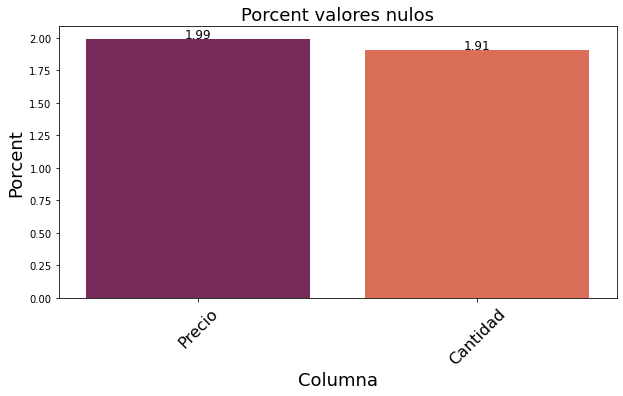

In [45]:
deteccion_nulos(venta)

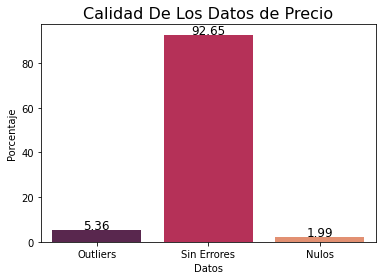

El porcentaje de datos correctos en la columna Precio es de: %92.65
El porcentaje de datos nulos en la columna Precio es de: %1.99
El porcentaje de outliers en la columna Precio es de: %5.36
Todos los valores por encima de 3815.5 son un outlier


In [46]:
calidaddelosdatos(venta,'Precio')

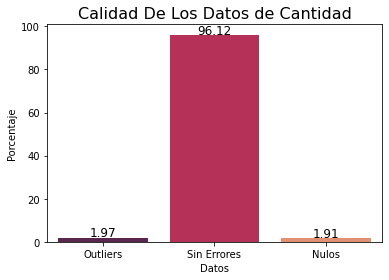

El porcentaje de datos correctos en la columna Cantidad es de: %96.12
El porcentaje de datos nulos en la columna Cantidad es de: %1.91
El porcentaje de outliers en la columna Cantidad es de: %1.97
Todos los valores por encima de 4.5 son un outlier


In [47]:
calidaddelosdatos(venta, 'Cantidad')

# TABLA CLIENTE
Diccionario
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCliente | ID | int64 | Clave única que identifica al cliente |
| 1 | Nombre_y_Apellido | Nombre_y_Apellido | object | Nombre y apellido del cliente |
| 2 | Edad | Edad | int64 | Edad del cliente |
| 3 | Telefono | Telefono | object | Teléfono del cliente |
| 4 | Domicilio | Domicilio | object | Domicilio del cliente |
| 5 | Provincia | Provincia | object | Provincia del cliente |
| 6 | Localidad | Localidad | object | Localidad del cliente |
| 7 | Latitud | X | float64 | Latitud del domicilio del cliente |
| 8 | Longitud | Y | float64 | Longitud del domicilio del cliente |

In [48]:
print('La tabla cliente tiene', cliente.shape, 'registros y colunmas en total')

La tabla cliente tiene (2384, 10) registros y colunmas en total


In [49]:
cliente.head(1)

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN


In [50]:
total_nulos = cliente.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla cliente es de', nulos(total_nulos))

El total de valores nulos de la tabla cliente es de 2633


,Columna,Val_nulos,PorcentVacio
7,col10,2384,100.000000
5,X,54,2.265101
6,Y,52,2.181208
2,Domicilio,43,1.803691
3,Telefono,31,1.300336
0,Provincia,25,1.048658
4,Localidad,25,1.048658
1,Nombre_y_Apellido,19,0.796980


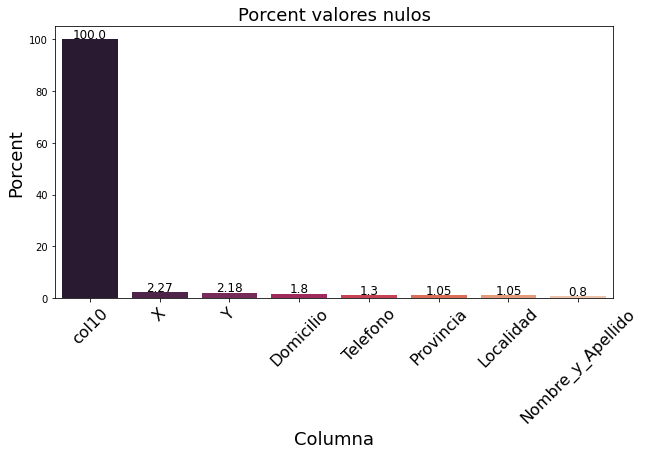

In [51]:
deteccion_nulos(cliente)

,Columna,Val_nulos,PorcentVacio
5,X,54,2.265101
6,Y,52,2.181208
2,Domicilio,43,1.803691
3,Telefono,31,1.300336
0,Provincia,25,1.048658
4,Localidad,25,1.048658
1,Nombre_y_Apellido,19,0.796980


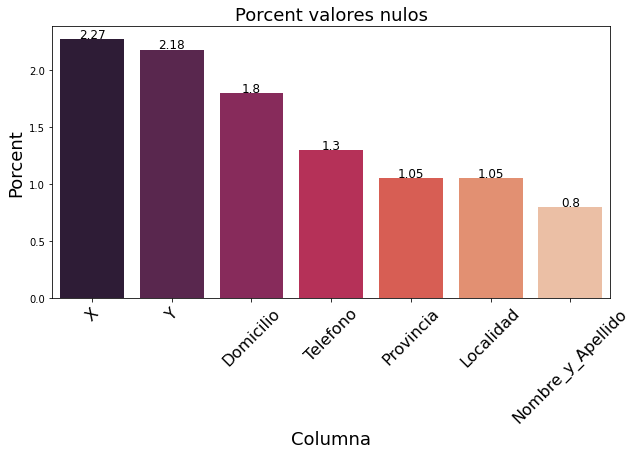

In [52]:
deteccion_nulos(cliente.drop(columns='col10'))

## TABLA SUCURSAL
DIRECCION
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdSucursal | ID | int64 | Clave única que identifica la sucursal |
| 1 | Sucursal | Sucursal | object | Nombre de la sucursal |
| 2 | Domicilio | Direccion | object | Domicilio de la sucursal |
| 3 | Localidad | Localidad | object | Localidad de la sucursal |
| 4 | Provincia | Provincia | object | Provincia de la sucursal |
| 5 | Latitud | Latitud | float64 | Latitud de la sucursal |
| 6 | Longitud | Longitud | float64 | Longitud de la sucursal |

In [53]:
print('La tabla sucursal tiene', sucursal.shape, 'registros y columnas en total')

La tabla sucursal tiene (31, 7) registros y columnas en total


In [54]:
sucursal.head(1)

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"


In [55]:
total_nulos = sucursal.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla sucursal es de', nulos(total_nulos))

El total de valores nulos de la tabla sucursal es de 0


In [56]:
deteccion_nulos(sucursal)

False

## TABLA PROVEEDOR
DICCIONARIO
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdProveedor | IDProveedor | int64 | Clave única que identifica al proveedor |
| 1 | Proveedor | Nombre | object | Nombre del proveedor |
| 2 | Domicilio | Address | object | Domicilio del proveedor |
| 3 | Ciudad | City | object | Ciudad del proveedor |
| 4 | Provincia | State | object | Provincia del proveedor |
| 5 | Pais | Country | object | Pais del proveedor |
| 6 | Departamento | departamen | object | Departamento del proveedor |

In [57]:
print('La tabla proveedor tiene', proveedor.shape, 'registros y columnas en total')

La tabla proveedor tiene (14, 7) registros y columnas en total


In [58]:
proveedor.head(1)

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA


In [59]:
total_nulos = proveedor.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla proveedor es de', nulos(total_nulos))

El total de valores nulos de la tabla proveedor es de 2


,Columna,Val_nulos,PorcentVacio
0,Nombre,2,14.285714


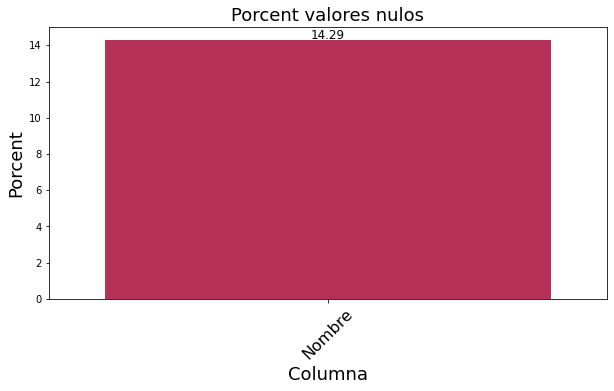

In [60]:
deteccion_nulos(proveedor)

## TABLA LOCALIDAD
DICCIONARIO
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdLocalidad | id | int64 | Clave única que identifica la localidad |
| 1 | Localidad | nombre | object | Nombre de la localidad |
| 2 | IdMunicipio | municipio_id | int64 | Clave única que identifica al municipio |
| 3 | Municipio | municipio_nombre | object | Nombre del municipio |
| 4 | IdDepartamento | departamento_id | int64 | Clave única que identifica al departamento |
| 5 | Departamento | departamento_nombre | object | Nombre del departamento |
| 6 | IdProvincia | provincia_id | int64 | Clave única que identifica la provincia |
| 7 | Provincia | provincia_nombre | object | Nombre de la provincia |
| 8 | Fuente | fuente | object | Fuente de información de datos censales |
| 9 | IdLocalidadCensal | localidad_censal_id | int64 | Clave única que identifica la localidad censal  |
| 10 | LocalidadCensal | localidad_censal_nombre | object | Nombre de la localidad censal |
| 11 | Categoria | categoria | object | Categoria de la localidad censal |
| 12 | Latitud | centroide_lat | float64 | Latitud de la localidad |
| 13 | Longitud | centroide_lon | float64 | Longitud de la localidad |

In [61]:
print('La tabla localidad tiene', localidad.shape, 'registros y columnas en total')

La tabla localidad tiene (4142, 14) registros y columnas en total


In [62]:
localidad.head(1)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-35.033073,-60.28062,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires


In [63]:
total_nulos = localidad.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla localidad es de', nulos(total_nulos))

El total de valores nulos de la tabla localidad es de 1039


,Columna,Val_nulos,PorcentVacio
2,municipio_id,543,13.109609
3,municipio_nombre,494,11.926606
0,departamento_id,1,0.024143
1,departamento_nombre,1,0.024143


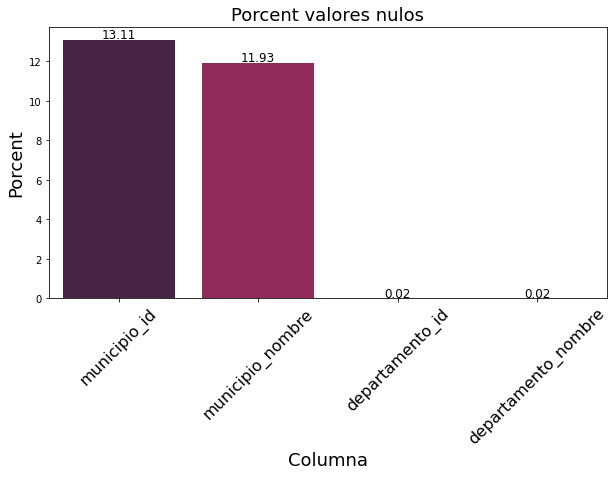

In [64]:
deteccion_nulos(localidad)

## TABLA GASTO
DICCIONARIO
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdGasto | IdGasto | int64 | Clave única que identifica el gasto |
| 1 | IdSucursal | IdSucursal | int64 | Clave única que identifica la sucursal |
| 2 | IdTipoGasto | IdTipoGasto | int64 | Clave única que identifica el tipo de gasto |
| 3 | Fecha | Fecha | datetime64 | Fecha registrada del gasto |
| 4 | Monto | Monto | float64 | Monto total del gasto |

In [65]:
print('La tabla gasto tiene', gasto.shape, 'registros y columnas en total')

La tabla gasto tiene (8640, 5) registros y columnas en total


In [66]:
gasto.head(1)

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.9


In [67]:
total_nulos = gasto.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla gasto es de', nulos(total_nulos))

El total de valores nulos de la tabla gasto es de 0


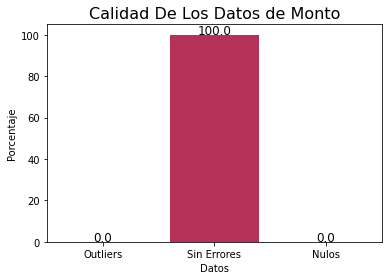

El porcentaje de datos correctos en la columna Monto es de: %100.00
El porcentaje de datos nulos en la columna Monto es de: %0.00
El porcentaje de outliers en la columna Monto es de: %0.00
Todos los valores por encima de 2368.7725 son un outlier


In [68]:
calidaddelosdatos(gasto, 'Monto')

## TABLA COMPRA
DICCIONARIO
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCompra | IdCompra | int64 | Clave única que identifica una compra |
| 1 | Fecha | Fecha | datetime64 | Fecha registrada de compra |
| 2 | Fecha_Año | Fecha_Año | int64 | Año registrado de compra |
| 3 | Fecha_Mes | Fecha_Mes | int64 | Mes registrado de compra |
| 4 | Fecha_Periodo | Fecha_Periodo | int64 | Periodo registrado de compra  |
| 5 | IdProducto | IdProducto | int64 | Clave única que identifica al producto adquirido |
| 6 | Cantidad | Cantidad | int64 | Cantidad de producto adquirido en la compra |
| 7 | Precio | Precio | float64 | Precio pagado por la compra |
| 8 | IdProveedor | IdProveedor | int64 | Clave única que identifica al proveedor |

In [69]:
print('La tabla compra tiene', compra.shape, 'registros y columnas en total')

La tabla compra tiene (11539, 9) registros y columnas en total


In [70]:
compra.head(1)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12


In [71]:
total_nulos = compra.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla compra es de', nulos(total_nulos))

El total de valores nulos de la tabla compra es de 367


,Columna,Val_nulos,PorcentVacio
0,Precio,367,3.180518


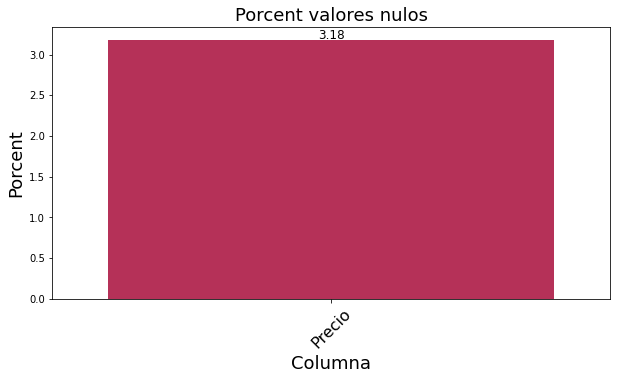

In [72]:
deteccion_nulos(compra)

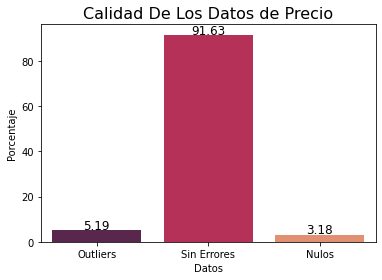

El porcentaje de datos correctos en la columna Precio es de: %91.63
El porcentaje de datos nulos en la columna Precio es de: %3.18
El porcentaje de outliers en la columna Precio es de: %5.19
Todos los valores por encima de 2690.5612499999997 son un outlier


In [73]:
calidaddelosdatos(compra,'Precio')

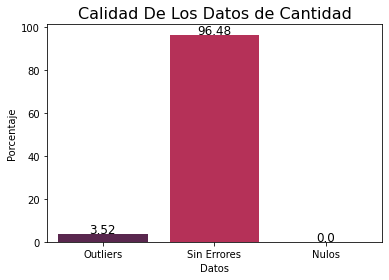

El porcentaje de datos correctos en la columna Cantidad es de: %96.48
El porcentaje de datos nulos en la columna Cantidad es de: %0.00
El porcentaje de outliers en la columna Cantidad es de: %3.52
Todos los valores por encima de 24.0 son un outlier


In [74]:
calidaddelosdatos(compra,'Cantidad')

Luego de este primer analisis se puede ver que casi todas las tablas presentan faltantes menos la tabla sucursal y gasto, ademas, se puede ver que en las tablas venta y compra, los precios y las cantidades tienen outliers por lo tanto a la hora de querer realizar balances al final de un mes, trimestre o año el resultado va a ser erroneo.
Mas adelante se hace un analisis mas exahutivo de las tablas y se encuentra que ademas algunas colunmas como por ejemplo localidad, provincia, latitud, longitud, entre otras, se encuentran incompletas o con los datos puestos de manera incorrecta por lo tanto las conexiones que se quieran hacer mediante esas columnas no van a ser correctas. Para tratar de acomodar estas cosas con el fin de poder a lo largo del tiempo realizar analisis de buena calidad a continuacion en otro archivo se normalizan los datos.

## **NUEVA SUCURSAL Y KPIs**

Despues de hacer un analisis de los datos se puede llegar a la conclusion de que la mayor cantidad de compras la realizan clientes que viven en la provincia de Buenos Aires y en la provincia de Cordoba. Luego de obtener esa informacion podemos decir que en la provincia de Cordoba es donde hay menos sucursales por lo tanto la recomendacion seria abrir una nueva sucursal ahi.

![](AnalisisEnPowerBI-1.png)

El grafico "Top 10 cantidad vendida por sucursal" muestra que la sucursal de flores es la que mas vende y la segunda es la de cabildo pero si se mira bien la sucursal de cordoba centro vende mas en cuanto a monto no ha cantidad.

![](AnalisisEnPowerBI-2.png)

Recomendacion de kpis de venta luego del analisis en Power BI: 

Las propuestas de KPIs serian:

Que se realice la venta total por año por sucursal con el fin de saber si es necesario cerrar alguna sucursal que no este funcionando, ademas a esto se le podria hacer una relacion con clientes para saber donde estan mas concentrados y asi en base a eso saber donde se podria abrir una nueva sucursal de ser necesario.
Ademas se podria hacer un analisis de cantidad de ventas relacionado con localidad para saber en que localidad se esta teniendo una mayor venta de productos.
Si se agregan datos de canales de ventas podria analizarse en hecho de realizar mas facilidades o descuentos para la venta online.